In [36]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.preprocessing import LabelEncoder

## This sets the plot style
## to have a grid on a white background
set_style("darkgrid")

In [37]:
X_orig = np.load('../../data/processed_data/specgram_db_pad_trunc.npy')

X_specaug1 = np.load('../../data/processed_data/augment_data/spec_pt_ftmask1.npy')
X_tsh1 = np.load('../../data/processed_data/augment_data/spec_pt_timeshift1.npy')
X_randn1 = np.load('../../data/processed_data/augment_data/spec_pt_randnoise1.npy')
X_tstr1 = np.load('../../data/processed_data/augment_data/spec_pt_timestretch1.npy')

X_specaug2 = np.load('../../data/processed_data/augment_data/spec_pt_ftmask2.npy')
X_tsh2 = np.load('../../data/processed_data/augment_data/spec_pt_timeshift2.npy')
X_randn2 = np.load('../../data/processed_data/augment_data/spec_pt_randnoise2.npy')
X_tstr2 = np.load('../../data/processed_data/augment_data/spec_pt_timestretch2.npy')

X_specaug3 = np.load('../../data/processed_data/augment_data/spec_pt_ftmask3.npy')
X_tsh3 = np.load('../../data/processed_data/augment_data/spec_pt_timeshift3.npy')
X_randn3 = np.load('../../data/processed_data/augment_data/spec_pt_randnoise3.npy')
X_tstr3 = np.load('../../data/processed_data/augment_data/spec_pt_timestretch3.npy')

print(X_orig.shape)

(440, 128, 67)


In [38]:
#choose what to add to the orignal data
X = np.concatenate((X_orig,X_specaug1,X_specaug2,X_randn1), axis=0)
print(X.shape)

df = pd.read_csv("../../data/processed_data/metadata.csv")

# Combine the three categories into a new column
df['combined_category'] = df['sex'].astype(str) + df['breed'].astype(str) + df['situation'].astype(str)

# Use LabelEncoder to encode the combined category labels
label_encoder = LabelEncoder()
df['combined_category_encoded'] = label_encoder.fit_transform(df['combined_category'])

# Check the mapping of original labels to encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)


y_orig = df['combined_category_encoded'].values
y = np.concatenate((y_orig, y_orig, y_orig,y_orig), axis=0)
#print(y.shape)

(1760, 128, 67)
Label Mapping: {'0european_shorthairbrushing': 0, '0european_shorthairfood': 1, '0european_shorthairisolation': 2, '0maine_coonbrushing': 3, '0maine_coonfood': 4, '0maine_coonisolation': 5, '1european_shorthairbrushing': 6, '1european_shorthairfood': 7, '1european_shorthairisolation': 8, '1maine_coonbrushing': 9, '1maine_coonfood': 10, '1maine_coonisolation': 11}


In [39]:
df

,Unnamed: 0,filename,situation,sex,breed,combined_category,combined_category_encoded
0,0,F_MAG01_EU_FN_FED01_106.wav,food,0,european_shorthair,0european_shorthairfood,1
1,1,I_NUL01_MC_MI_SIM01_304.wav,isolation,1,maine_coon,1maine_coonisolation,11
2,2,I_MEG01_MC_FI_SIM01_304.wav,isolation,0,maine_coon,0maine_coonisolation,5
3,3,B_CAN01_EU_FN_GIA01_205.wav,brushing,0,european_shorthair,0european_shorthairbrushing,0
4,4,F_MAG01_EU_FN_FED01_304.wav,food,0,european_shorthair,0european_shorthairfood,1
...,...,...,...,...,...,...,...
435,435,I_TIG01_EU_FN_GIU01_201.wav,isolation,0,european_shorthair,0european_shorthairisolation,2
436,436,B_NIG01_MC_MN_SIM01_101.wav,brushing,1,maine_coon,1maine_coonbrushing,9
437,437,B_CAN01_EU_FN_GIA01_208.wav,brushing,0,european_shorthair,0european_shorthairbrushing,0
438,438,B_WHO01_MC_FI_SIM01_203.wav,brushing,0,maine_coon,0maine_coonbrushing,3


In [40]:
# NEW to CONV nets
## We need to reshape our data to be the correct dimensions for
## the net
## observations, grid, colorvalues

##so we just need to add the colorvalues, 1 here represents single valued
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
print(X.shape)

(1760, 128, 67, 1)


In [41]:
def plottv(history_dict,epochs):
    plt.figure(figsize = (8,6))

    plt.scatter(range(1,epochs+1), history_dict['accuracy'], label = "Training Accuracy")
    plt.scatter(range(1,epochs+1), history_dict['val_accuracy'], label = "Validation Set Accuracy")

    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.legend(fontsize=12)

    plt.show()


    plt.figure(figsize = (8,6))

    plt.scatter(range(1,epochs+1), history_dict['loss'], label = "Training Loss")
    plt.scatter(range(1,epochs+1), history_dict['val_loss'], label = "Validation Set Loss")

    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Loss Function Value", fontsize=12)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.legend(fontsize=12)

    plt.show()

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                       test_size=.2,
                                                       shuffle=True,
                                                       random_state=100,
                                                       stratify=y)

In [43]:
## Importing the things
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 6.5076 - accuracy: 0.0608 - val_loss: 18.8319 - val_accuracy: 0.1106
Epoch 2/100
1/1 [==============================] - 3s 3s/step - loss: 18.8079 - accuracy: 0.1183 - val_loss: 14.7806 - val_accuracy: 0.1553
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 15.0826 - accuracy: 0.1471 - val_loss: 8.6228 - val_accuracy: 0.0766
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 8.5741 - accuracy: 0.0778 - val_loss: 5.3013 - val_accuracy: 0.2404
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 5.1607 - accuracy: 0.2612 - val_loss: 2.7800 - val_accuracy: 0.2404
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 2.7408 - accuracy: 0.2612 - val_loss: 2.4430 - val_accuracy: 0.1553
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 2.4457 - accuracy: 0.1471 - val_loss: 2.3131 - val_accuracy: 0.1894
Epoch 8/100
1/1 [=============

Epoch 60/100
1/1 [==============================] - 3s 3s/step - loss: 0.1851 - accuracy: 0.9488 - val_loss: 0.4244 - val_accuracy: 0.8660
Epoch 61/100
1/1 [==============================] - 3s 3s/step - loss: 0.1688 - accuracy: 0.9574 - val_loss: 0.4249 - val_accuracy: 0.8596
Epoch 62/100
1/1 [==============================] - 3s 3s/step - loss: 0.1605 - accuracy: 0.9563 - val_loss: 0.4098 - val_accuracy: 0.8638
Epoch 63/100
1/1 [==============================] - 3s 3s/step - loss: 0.1468 - accuracy: 0.9595 - val_loss: 0.4150 - val_accuracy: 0.8638
Epoch 64/100
1/1 [==============================] - 3s 3s/step - loss: 0.1381 - accuracy: 0.9680 - val_loss: 0.4057 - val_accuracy: 0.8723
Epoch 65/100
1/1 [==============================] - 3s 3s/step - loss: 0.1245 - accuracy: 0.9755 - val_loss: 0.3919 - val_accuracy: 0.8702
Epoch 66/100
1/1 [==============================] - 3s 3s/step - loss: 0.1176 - accuracy: 0.9765 - val_loss: 0.3769 - val_accuracy: 0.8702
Epoch 67/100
1/1 [=========

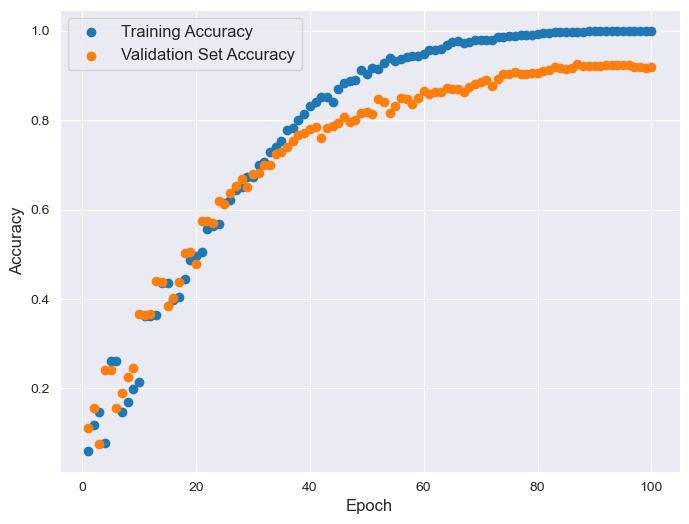

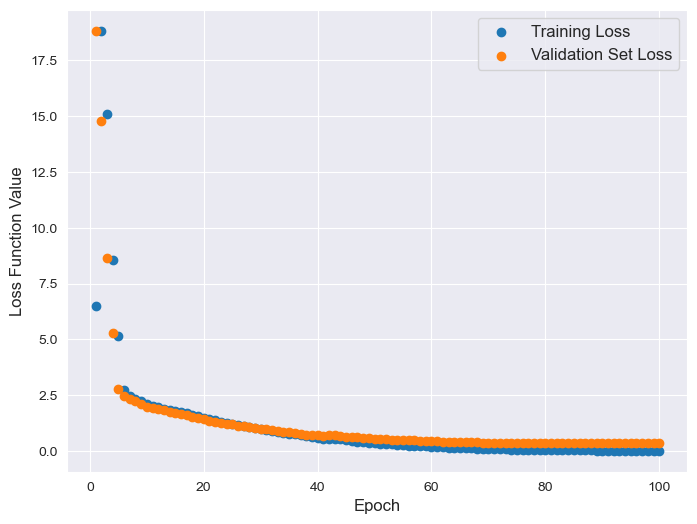

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 8.2245 - accuracy: 0.1321 - val_loss: 16.5579 - val_accuracy: 0.0682
Epoch 2/100
1/1 [==============================] - 4s 4s/step - loss: 16.6398 - accuracy: 0.0607 - val_loss: 10.9089 - val_accuracy: 0.0981
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 10.4747 - accuracy: 0.1203 - val_loss: 6.0665 - val_accuracy: 0.0768
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 6.0562 - accuracy: 0.0767 - val_loss: 4.9484 - val_accuracy: 0.2687
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 5.0822 - accuracy: 0.2471 - val_loss: 3.1546 - val_accuracy: 0.2687
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 3.2044 - accuracy: 0.2471 - val_loss: 2.8244 - val_accuracy: 0.1365
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 2.7873 - accuracy: 0.1534 - val_loss: 2.5478 - val_accuracy: 0.2175
Epoch 8/100
1/1 [=============

Epoch 60/100
1/1 [==============================] - 3s 3s/step - loss: 0.3976 - accuracy: 0.8946 - val_loss: 0.7175 - val_accuracy: 0.7868
Epoch 61/100
1/1 [==============================] - 3s 3s/step - loss: 0.3784 - accuracy: 0.8924 - val_loss: 0.6895 - val_accuracy: 0.8017
Epoch 62/100
1/1 [==============================] - 3s 3s/step - loss: 0.3553 - accuracy: 0.8978 - val_loss: 0.6676 - val_accuracy: 0.8081
Epoch 63/100
1/1 [==============================] - 3s 3s/step - loss: 0.3367 - accuracy: 0.9010 - val_loss: 0.6654 - val_accuracy: 0.7974
Epoch 64/100
1/1 [==============================] - 3s 3s/step - loss: 0.3176 - accuracy: 0.9169 - val_loss: 0.6619 - val_accuracy: 0.8188
Epoch 65/100
1/1 [==============================] - 3s 3s/step - loss: 0.2990 - accuracy: 0.9191 - val_loss: 0.6365 - val_accuracy: 0.8294
Epoch 66/100
1/1 [==============================] - 3s 3s/step - loss: 0.2791 - accuracy: 0.9223 - val_loss: 0.6256 - val_accuracy: 0.8209
Epoch 67/100
1/1 [=========

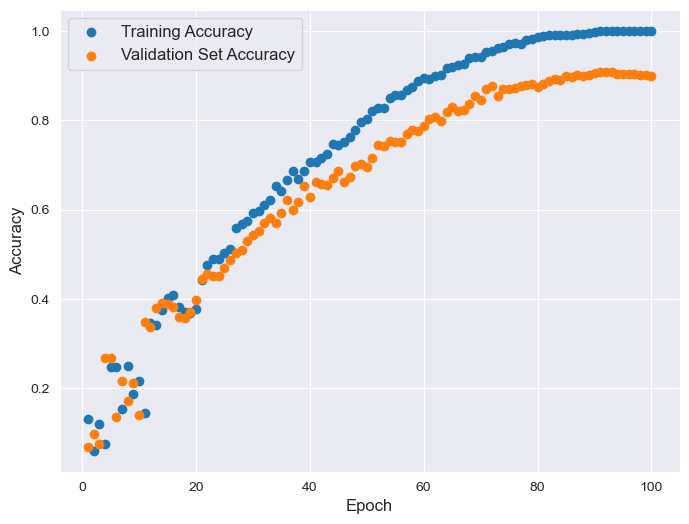

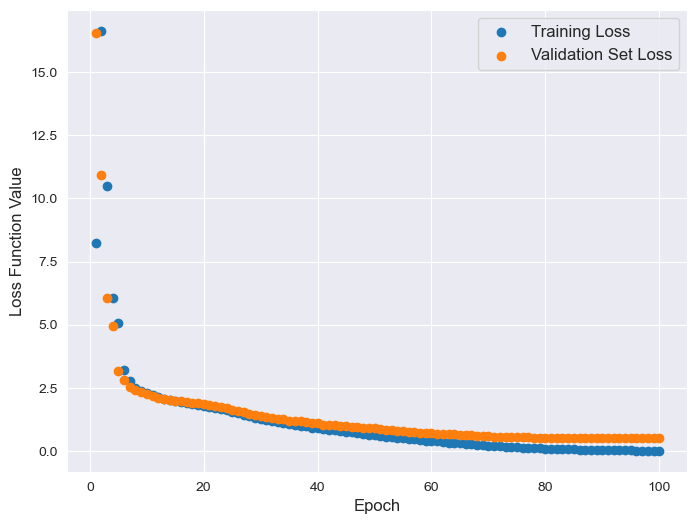

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 12.1105 - accuracy: 0.0511 - val_loss: 24.5014 - val_accuracy: 0.1023
Epoch 2/100
1/1 [==============================] - 3s 3s/step - loss: 24.7039 - accuracy: 0.0948 - val_loss: 18.9634 - val_accuracy: 0.0256
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 18.5418 - accuracy: 0.0288 - val_loss: 8.3983 - val_accuracy: 0.3113
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 8.0968 - accuracy: 0.3184 - val_loss: 4.6349 - val_accuracy: 0.3348
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 4.4811 - accuracy: 0.3397 - val_loss: 2.7330 - val_accuracy: 0.2303
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 2.6707 - accuracy: 0.2599 - val_loss: 2.3967 - val_accuracy: 0.1748
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 2.3698 - accuracy: 0.1576 - val_loss: 2.3136 - val_accuracy: 0.2196
Epoch 8/100
1/1 [============

Epoch 60/100
1/1 [==============================] - 10s 10s/step - loss: 0.4318 - accuracy: 0.8775 - val_loss: 0.6874 - val_accuracy: 0.7910
Epoch 61/100
1/1 [==============================] - 9s 9s/step - loss: 0.4025 - accuracy: 0.8892 - val_loss: 0.6630 - val_accuracy: 0.7889
Epoch 62/100
1/1 [==============================] - 9s 9s/step - loss: 0.3914 - accuracy: 0.8914 - val_loss: 0.6584 - val_accuracy: 0.8017
Epoch 63/100
1/1 [==============================] - 9s 9s/step - loss: 0.3792 - accuracy: 0.9010 - val_loss: 0.6526 - val_accuracy: 0.7953
Epoch 64/100
1/1 [==============================] - 8s 8s/step - loss: 0.3607 - accuracy: 0.9031 - val_loss: 0.6567 - val_accuracy: 0.7974
Epoch 65/100
1/1 [==============================] - 7s 7s/step - loss: 0.3529 - accuracy: 0.9063 - val_loss: 0.6144 - val_accuracy: 0.8230
Epoch 66/100
1/1 [==============================] - 9s 9s/step - loss: 0.3307 - accuracy: 0.9105 - val_loss: 0.6089 - val_accuracy: 0.8294
Epoch 67/100
1/1 [=======

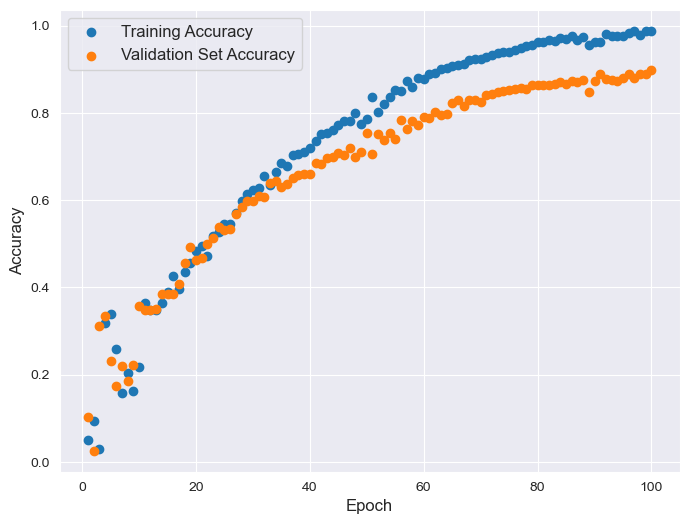

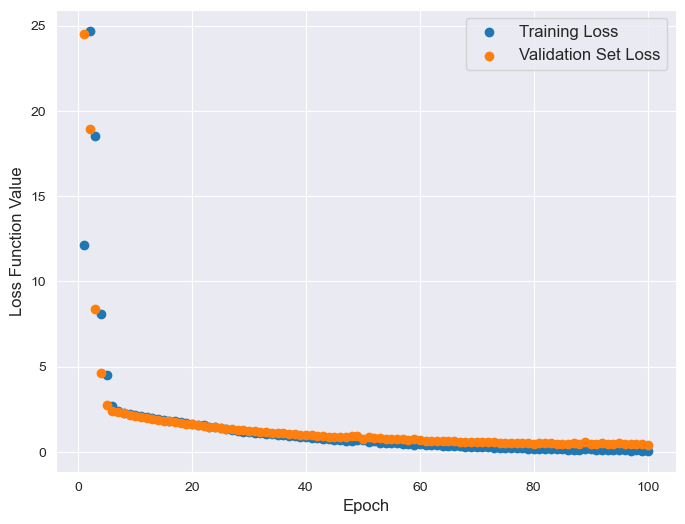

In [44]:
## Cross Validation folds
kfold = StratifiedKFold(3,
                        shuffle=True,
                        random_state=846)
epochs=100

for train_index, test_index in kfold.split(X_train,y_train):
    
    X_tt, X_val = X[train_index], X[test_index]
    y_tt, y_val = y[train_index], y[test_index]
    
    model = models.Sequential()
    model.add( layers.Conv2D(32, (6,4), activation='relu', input_shape=(X.shape[1],X.shape[2],1,) ) )
    model.add( layers.MaxPooling2D( (3,2), strides = 2 ) )
    model.add( layers.Conv2D(64, (6,4), activation='relu'))
    model.add( layers.MaxPooling2D( (3,2), strides = 2) )
    model.add( layers.Conv2D(96, (6,4), activation='relu'))
    model.add( layers.MaxPooling2D( (3,2), strides = 2) )
    
    
    model.add( layers.Flatten() )
    model.add(layers.Dense(96, activation='relu'))

    ## Finally an output layer
    model.add(layers.Dense(12, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_tt, 
                          to_categorical(y_tt), 
                          epochs=epochs, 
                          batch_size=int(len(y_tt)),
                          validation_data=(X_val,to_categorical(y_val)))
    history_dict = history.history
    plottv(history_dict,epochs)

In [45]:
epochs = 80 ##earlier stop, observed from Cross validation

model = models.Sequential()
model.add( layers.Conv2D(32, (6,4), activation='relu', input_shape=(X.shape[1],X.shape[2],1,) ) )
model.add( layers.MaxPooling2D( (3,2), strides = 2 ) )
model.add( layers.Conv2D(64, (6,4), activation='relu'))
model.add( layers.MaxPooling2D( (3,2), strides = 2) )
model.add( layers.Conv2D(96, (6,4), activation='relu'))
model.add( layers.MaxPooling2D( (3,2), strides = 2) )
    
    
model.add( layers.Flatten() )
model.add(layers.Dense(96, activation='relu'))

## Finally an output layer
model.add(layers.Dense(12, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, 
                    to_categorical(y_train), 
                    epochs=epochs, 
                    batch_size=len(y_train)
                    )
#history_dict = history.history
#plottv(history_dict,epochs)

Epoch 1/80
1/1 [==============================] - 7s 7s/step - loss: 8.4794 - accuracy: 0.0753
Epoch 2/80
1/1 [==============================] - 5s 5s/step - loss: 18.8512 - accuracy: 0.1513
Epoch 3/80
1/1 [==============================] - 5s 5s/step - loss: 28.6205 - accuracy: 0.3068
Epoch 4/80
1/1 [==============================] - 6s 6s/step - loss: 12.3413 - accuracy: 0.0618
Epoch 5/80
1/1 [==============================] - 6s 6s/step - loss: 8.0244 - accuracy: 0.0909
Epoch 6/80
1/1 [==============================] - 7s 7s/step - loss: 4.0095 - accuracy: 0.0334
Epoch 7/80
1/1 [==============================] - 5s 5s/step - loss: 2.6311 - accuracy: 0.1300
Epoch 8/80
1/1 [==============================] - 6s 6s/step - loss: 2.5120 - accuracy: 0.1456
Epoch 9/80
1/1 [==============================] - 6s 6s/step - loss: 2.4450 - accuracy: 0.1555
Epoch 10/80
1/1 [==============================] - 6s 6s/step - loss: 2.2646 - accuracy: 0.3061
Epoch 11/80
1/1 [=============================

In [46]:
model.evaluate(X_test,to_categorical(y_test)) ##If want to use this predict new data, use model.predict() after loading the model



11/11 [==============================] - 0s 26ms/step - loss: 0.3043 - accuracy: 0.9034


[0.30425235629081726, 0.9034090638160706]

In [47]:
predictions = model.predict(X_test)

11/11 [==============================] - 0s 30ms/step


In [48]:
predicted_categ = np.argmax(predictions, axis=1)

# 'predicted_labels' now contains the predicted class indices for each sample
print(predicted_categ)

[ 2  1  2  3  8  2  9  7  2  2  9  0  2  2  0  5  0  5 10 11  5  0  2  3
  8  0  2  0  0  5  5  2  2  3  5  0  3  2  2  2  0  3  2  6 11  3  5  1
  0  1  2  2  5  2  5  0  9 11  5  5  3  4 11  2  2  3  0  2  0  2  2  6
 11  4  2  0  2  2  2  4  0  1  5  9  2  2  4  5  8  2  2  8  5  3  2  4
  0  2  8  2  2 10  7  5 10  0  2  0  4  5  3  0  2  2  2  5  5  9  5 10
  5  1  2  9  8  2  1  3  1  2  9  3  2 11  5  2  1  1  1  5 10  1  2  0
  2  9  7  5  2  5  0  0  5  4  5  2  4  3  2  5  8  5  2  2  7  0  2  0
  2  2  2  2  5  1  8  3  0  3  0 11  5  3  5  3  3  2  9  0  2  2  3  8
  1  0  4  7  0  5 11  2  5 11  3  4  5  0  0 11  0  0  0  5  2  2  5  2
  1 10  2  5  2  2  2  5 10  0 11  2  7  8  1  7  1  1  2  2  9  8  5 11
  2  3 11 11  5  0  5  0  1  0  4  0  1  8  4  0 11  2  0  2 10  3 11  1
  1  5 11  0  2  2  9  4 11  2  0  1  9  9  0  9  0  3  5  1  1  1  8  2
  0  2  1  1  9  1  0  1  5  2  1  2  2  1 11  1  5  5  2  2  5  3  0  2
  2  3  0 11  3  9  5  5  3  9  2 10  1 11 10  2  4

In [49]:
predicted_categ-y_test

array([  0,   0,   0,   0,   0,   0,  -2,   0,   0,   0,   0,   0,   0,
         0,  -8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   8,   0,
         0, -10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         2,  -1,   0,   0,   0,   0,  -2,   0,   0,   0,   1,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  -9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  -1,   0,   0,   0,   6,   0,   0,
         0,  -2,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   6,   0,  -1,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   8,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   

In [50]:
from tensorflow.keras.models import load_model

model.save("/Users/jinjingyi/meow/meow-by-meow/data/trained_models/CNN/CNN_dataaug_with_2freqtime1rand_masking_bgs.h5")


